In [82]:
import numpy as np

class LogisticRegression:
  def __init__(self, learning_rate = 0.01, n_iterations = 100, random_state = 69):
    self.learning_rate = learning_rate
    self.n_iterations = n_iterations
    self.theta = None
    self.rgen = np.random.RandomState(seed = random_state)
    
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))
  
  def loss(self, h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 -h)).mean()
  
  def predict_prob(self, X):
    return self.sigmoid(X @ self.theta)
  
  def predict(self, X, threshold = 0.5):
    return self.predict_prob(X) >= threshold
  
  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.theta = self.rgen.normal(loc=0, scale=1, size= n_features)
    for _ in range(self.n_iterations):
      z = X @ self.theta
      h = self.sigmoid(z)
      gradient = (X.T @ (h - y))/n_samples
      self.theta += self.learning_rate * -gradient
    return self.theta
      
  def fit_sgd(self, X, y):
    n_samples, n_features = X.shape
    self.theta = self.rgen.normal(loc = 0, scale = 1 , size= n_features)
    for _ in range(self.n_iterations):
      for i in range(n_samples):
        xi, target = X[i], y[i]
        z = xi @ self.theta
        h = self.sigmoid(z)
        error = h - target
        gradient = xi * error
        self.theta += self.learning_rate * -gradient
    return self.theta
  
  def fit_mini_batch_sgd(self, X, y, batch_size = 32):
    n_samples, n_features = X.shape
    self.theta = self.rgen.normal(loc = 0, scale = 1 , size = n_features)
    for _ in range(self.n_iterations):
      indices = self.rgen.permutation(n_samples)
      for start in range(0, n_samples, batch_size):
        end = start + batch_size
        batch_indices = indices[start:end]
        X_batch, y_batch = X[batch_indices], y[batch_indices]
        z = X_batch @ self.theta
        h = self.sigmoid(z)
        error = h - y_batch
        gradient = (X_batch.T @ error)/batch_size
        self.theta += self.learning_rate * -gradient
    return self.theta
    

# Adeline TEST

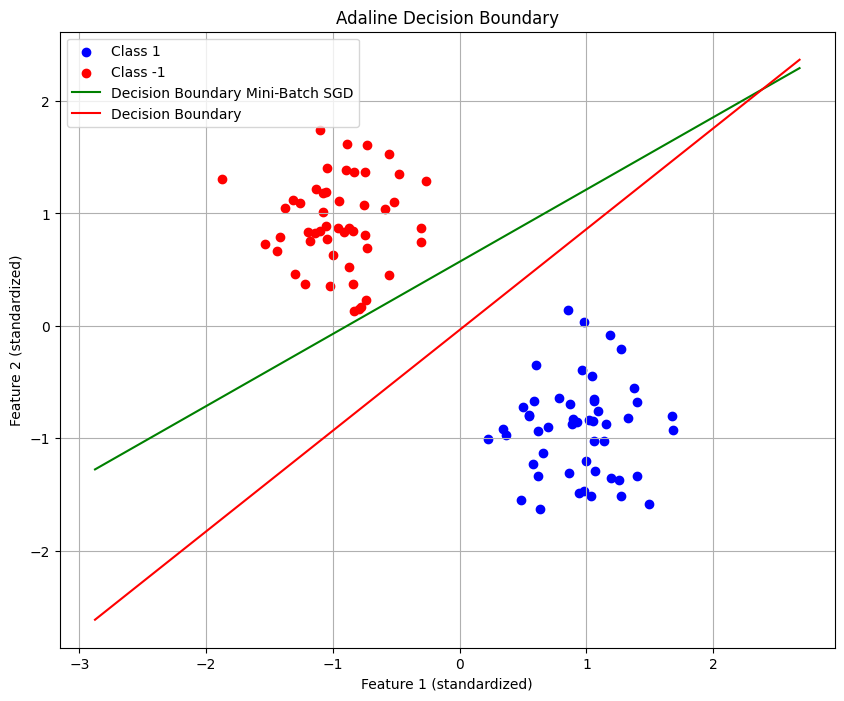

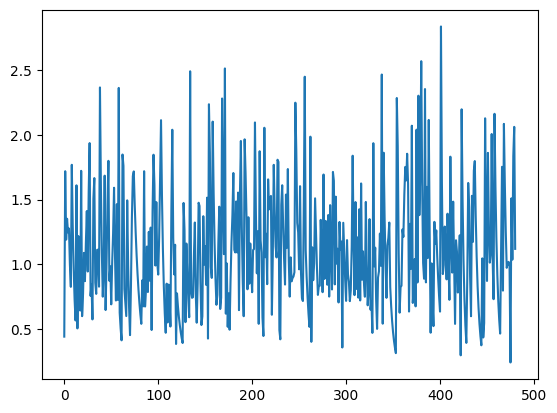

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generate two blobs of points
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term to X
X_with_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Fit Adaline model
adaline = Adaline(learning_rate=0.01, n_iterations=100)
adaline.fit_mini_batch_sgd(X_with_bias, y)

# Plot the points
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_scaled[y == -1][:, 0], X_scaled[y == -1][:, 1], color='red', label='Class -1')

# Plot the decision boundary
weights = adaline.weights
slope = -weights[1] / weights[2]
intercept = -weights[0] / weights[2]

x_vals = np.array([X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1])
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary Mini-Batch SGD')

adaline.fit(X_with_bias, y)

weights = adaline.weights
slope = -weights[1] / weights[2]
intercept = -weights[0] / weights[2]

x_vals = np.array([X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1])
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Adaline Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


mse_error = adaline.mse_error


plt.plot(range(len(mse_error)), mse_error)

# Perceptron TEST

Training time: 0.36 seconds
Accuracy: 0.98
Training time: 0.37 seconds
Accuracy SGD: 0.96
Training time: 0.02 seconds
Accuracy Mini-batch SGD: 0.98


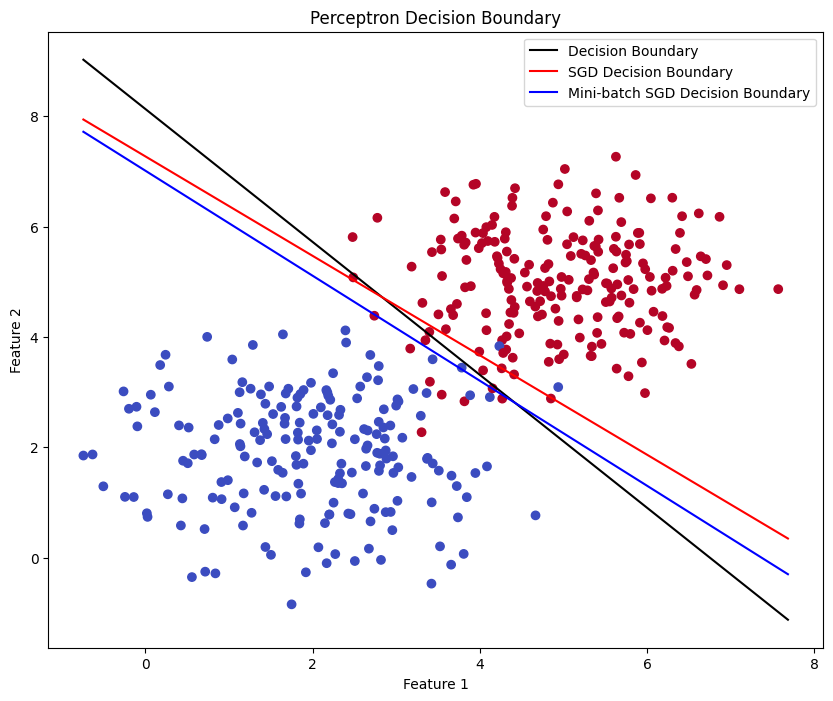

In [52]:
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import time
import matplotlib.pyplot as plt

centers = [[2, 2], [5, 5]]
n_classes = len(centers)
n_samples = 512

np.random.seed(69)

data, labels = make_blobs(n_samples=n_samples, centers=centers, random_state=69)

# Data setup
X = np.stack((np.ones(n_samples), data[:, 0], data[:, 1]), axis=1)
y = np.where(labels == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
x1 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)


plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


my_perceptron = Perceptron(learning_rate=0.01, n_iterations=100)


# Normal perceptron
start_time = time.time()
w = my_perceptron.train(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Plotting decision boundary
x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, 'k-', label='Decision Boundary')
plt.title('Perceptron Decision Boundary')


y_pred = np.array([my_perceptron.predict(xi) for xi in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# SGD Perceptron

start_time = time.time()
w = my_perceptron.train_sgd(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, 'r-', label='SGD Decision Boundary')

# Evaluate accuracy
y_pred = np.array([my_perceptron.predict(xi) for xi in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy SGD: {accuracy:.2f}")


# Mini-batch SGD Perceptron

start_time = time.time()
w = my_perceptron.train_mini_batch_sgd(X_train, y_train, batch_size=32)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

x2 = -(w[0] + w[1]*x1) / w[2]
plt.plot(x1, x2, 'b-', label='Mini-batch SGD Decision Boundary')

# Evaluate accuracy
y_pred = np.array([my_perceptron.predict(xi) for xi in X_test])
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Mini-batch SGD: {accuracy:.2f}")

plt.legend()
plt.show()



# Linear Regression TEST

(80, 2)
(80,)
Mean Squared Error: 104.20222653187022


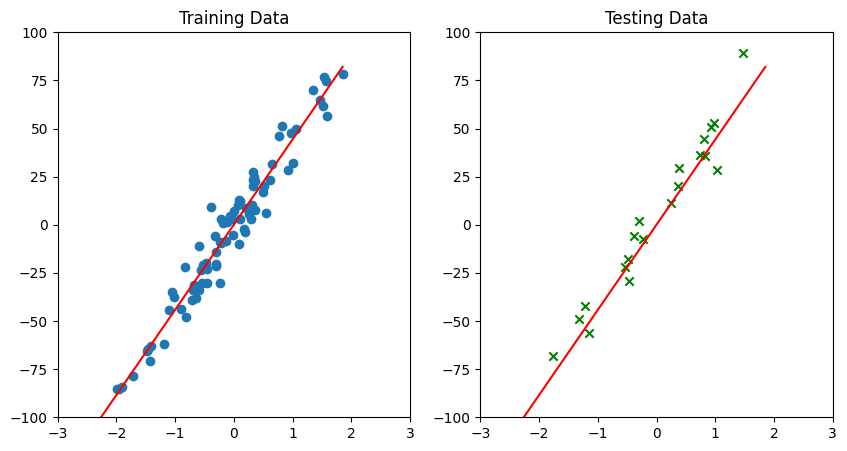

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].scatter(X_train[:, 1], y_train, label='Training Data')
ax[0].set_title('Training Data')
ax[0].set_xlim(-3, 3)
ax[0].set_ylim(-100, 100)

linear_regression = LinearRegression()
weights = linear_regression.fit(X_train, y_train)

x_plot = np.linspace(X_train[:,1].min(), X_train[:,1].max(), 100)
y_plot = weights[0] + weights[1] * x_plot
ax[0].plot(x_plot, y_plot, color='red', label='Regression Line')




ax[1].scatter(X_test[:, 1], y_test, color='green', label='Testing Data', marker='x')
ax[1].set_title('Testing Data')
ax[1].set_xlim(-3, 3)
ax[1].set_ylim(-100, 100)
ax[1].plot(x_plot, y_plot, color='red', label='Regression Line')

from sklearn.metrics import mean_squared_error
y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Polynomial Regression TEST

(512, 4)


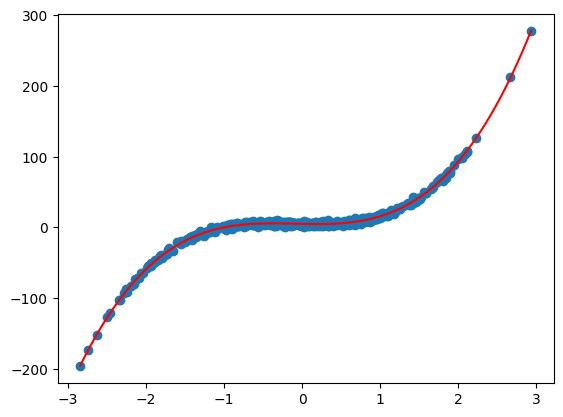

In [113]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 512
rgen = np.random.RandomState(seed = 69)
x1 = rgen.normal(loc= 0, scale = 1, size=n_samples)
a = 10
b = 3
c = -2
d = 5
y = a * x1**3 + b*x1**2 + c * x1 + d + rgen.normal(loc=0, scale=2, size=n_samples)
plt.scatter(x1, y)
matrix = np.stack((np.ones(n_samples), x1, x1**2, x1**3), axis = 1)
poly = PolynomialRegression()
w = poly.fit(matrix, y)
x_grid = np.linspace(np.min(x1), np.max(x1), 100)
y_pred = w[0] + w[1] * x_grid + w[2] * x_grid**2 + w[3] * x_grid**3
plt.plot(x_grid, y_pred, c='red')

# Logistic Regression TEST

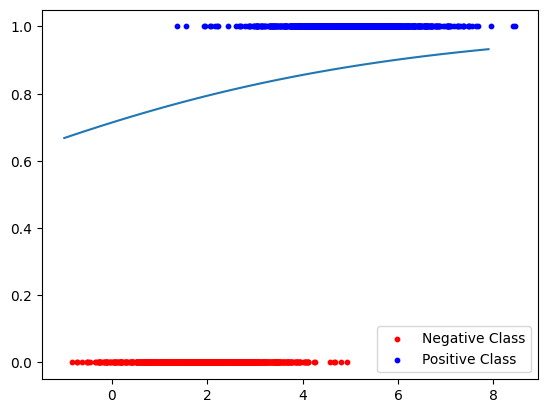

In [89]:
import numpy as np

rgen = np.random.RandomState(seed = 69)

n_samples, n_features = 1000, 2
x1 = rgen.normal(loc = 2, scale= 1, size=n_samples)
y1 = np.zeros(n_samples)
x2 = rgen.normal(loc = 5, scale=1, size= n_samples)
y2 = np.ones(n_samples)

plt.scatter(x1, y1, c='red', s = 10, label='Negative Class')
plt.scatter(x2, y2, c='blue', s = 10, label='Positive Class')
plt.legend()

X = np.stack((np.zeros(n_samples * 2), np.concatenate((x1, x2))), axis= 1)
y = np.concatenate((y1, y2))

reg = LogisticRegression(n_iterations = 1000)

theta = reg.fit(X,y)

x_plot = np.arange(-1, 8, 0.1)

xx = np.stack((np.ones(len(x_plot)), x_plot), axis= 1)

y_plot = reg.sigmoid(xx@ theta)

plt.plot(x_plot, y_plot)

